# Regression Analysis of Product Selling Quantities

This is an analysis report about the product sale quantity regression on the features of product real price, service score, nantional real disposable personal income, average number of stores selling this product, selling months and/or their log transformations.  

The detailed 11 problems to be solved are as follows:  

1. Regress, with an intercept term, log(quantity) on log(product_real_price), log(service_score), log(real_disp_pers_inc) and product_stores  

2. Comment on the coefficient of log(product_real_price) – statistically and the interpretation in the context of retail business.  

3. Comment on the coefficient of log(real_disp_pers_inc) (national real disposable personal income)– statistically and the interpretation in the context of retail business.  

4. Could you or could you not accept this model? Why or why not?  

5. Enhance the specification by regressing, with an intercept terms, log(quantity) on log(product_real_price), log(service_score), log(real_disp_pers_inc) and product_stores , PLUS SEASONAL MONTHLY BINARY VARIABLES OF YOUR CHOICE (Mxx).  

6. Comment on the coefficient of log(product_real_price) – statistically and the interpretation in the context of demand theory (this product’s demand).  

7. Comment on the coefficient of log(real_disp_pers_inc) – statistically and the interpretation in the context of demand theory (this product’s demand).  

8. Interpret the coefficient of product_stores.  

9. What happen when all Mxx are included as independent variables?  

10. Interpret the coefficient of M08 (August).  

11. Would you or would you not accept this model? Why or why not?

_**The following codes were tested under an environment of python 3.9**_

In [158]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
# load the data
quantity = pd.read_csv('data.csv')
quantity.head()

,month,quantity,product_real_price,service_score,real_disp_pers_inc,product_stores,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
0,5-Feb,40415305,0.564579,2207,9190.1,686.9054,0,1,0,0,0,0,0,0,0,0,0,0
1,5-Mar,52544001,0.560363,1864,9183.5,688.2814,0,0,1,0,0,0,0,0,0,0,0,0
2,5-Apr,56089039,0.578420,2061,9206.1,687.4706,0,0,0,1,0,0,0,0,0,0,0,0
3,5-May,50559014,0.596748,2025,9253.6,689.1815,0,0,0,0,1,0,0,0,0,0,0,0
4,5-Jun,53225857,0.595003,2068,9299.9,692.9923,0,0,0,0,0,1,0,0,0,0,0,0


In [160]:
# check the variable types
quantity.dtypes

month                  object
quantity                int64
product_real_price    float64
service_score           int64
real_disp_pers_inc    float64
product_stores        float64
M01                     int64
M02                     int64
M03                     int64
M04                     int64
M05                     int64
M06                     int64
M07                     int64
M08                     int64
M09                     int64
M10                     int64
M11                     int64
M12                     int64
dtype: object

In [178]:
# check missing values
quantity.isnull().mean()

month                 0.0
quantity              0.0
product_real_price    0.0
service_score         0.0
real_disp_pers_inc    0.0
product_stores        0.0
M01                   0.0
M02                   0.0
M03                   0.0
M04                   0.0
M05                   0.0
M06                   0.0
M07                   0.0
M08                   0.0
M09                   0.0
M10                   0.0
M11                   0.0
M12                   0.0
dtype: float64

## Q1: Regress, with an intercept term, log(quantity) on log(product_real_price), log(service_score), log(real_disp_pers_inc) and product_stores

### A1: Build the regression model and show the stastitical summary

In [162]:
model1 = smf.ols('np.log(quantity) ~ np.log(product_real_price) + \
                np.log(service_score) + np.log(real_disp_pers_inc) + product_stores', \
                data=quantity).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(quantity)   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     42.24
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           2.60e-20
Time:                        11:54:53   Log-Likelihood:                 45.050
No. Observations:                 100   AIC:                            -80.10
Df Residuals:                      95   BIC:                            -67.07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Q2: Comment on the coefficient of log(product_real_price) – statistically and the interpretation in the context of retail business.

### A2:

#### From the statsitical perspective:
The coefficient of log(product_real_price) is 1.4282 which represents a positive relationship between the product_real_price and the quantity. The p-value of the coefficient is 0.010 which means that it has only 1% probability to observe the same or more extreme value and therefore we are confident enough (>95%) to reject the null hypothesis which states that there is no relationship between the log(product_real_price) and the log(quantity).

#### Interpretation in the context of retail business:
Becasue both the response and predictor variables are log transfomred, the coefficient of 1.4282 means that for every 1% increase in the product_real_price, the quantity increases by about 1.43%.

## Q3: Comment on the coefficient of log(real_disp_pers_inc) (national real disposable personal income)– statistically and the interpretation in the context of retail business.

### A3:

#### From the statistical perspective:
The coeffcient of log(real_disp_pers_inc) is -1.0197 which represents a negative relationship between the real_disp_pers_inc and the quantity. The p-value of the coefficient is 0.215 which means that it has 21.5% probability to observe the same or more extrem value and therefore we are not confident enough (<95%) to reject the null hypothesis which states that there is no relationship between the log(real_disp_pers_inc) and the log(quantity).

#### Interpretation in the context of retail business:
Because both the response and predictor variables are log transformed, the coefficient of -1.0197 means that for every 1% increase in the real_disp_pers_inc, the quantity decreases by about 1.02%.

## Q4: Could you or could you not accept this model? Why or why not?

### A4:

I will not accpet this model because the R-squared value of this model is 0.640 which means there are only 64% of variance of the quantity are explained by this model. The small value of R-squared is probably due to the lack of predictors.



## Q5: Enhance the specification by regressing, with an intercept terms, log(quantity) on log(product_real_price), log(service_score), log(real_disp_pers_inc) and product_stores , PLUS SEASONAL MONTHLY BINARY VARIABLES OF YOUR CHOICE (Mxx).

### A5: Build the model and show the statistical summary

In [163]:
model2 = smf.ols('np.log(quantity) ~ np.log(product_real_price) + \
                np.log(service_score) + np.log(real_disp_pers_inc) + product_stores + \
                M02 + M03 + M04 + M05 + M06 + M07 + M08 + M09 + M10 + M11 + M12', \
                data=quantity).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(quantity)   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     87.54
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           1.17e-44
Time:                        11:54:54   Log-Likelihood:                 134.52
No. Observations:                 100   AIC:                            -237.0
Df Residuals:                      84   BIC:                            -195.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Q6: Comment on the coefficient of log(product_real_price) – statistically and the interpretation in the context of demand theory (this product’s demand).

### A6:

#### From the statistical perspective:
The coefficient of log(product_real_price) is -0.7633 which represents a negative relationship between the product_real_price and the quantity. The p-value of the coefficient is 0.007 which means that it has only 0.7% probability to observe the same or more extreme value and therefore we are confident enough (>95%) to reject the null hypothesis which states that there is no relationship between the log(product_real_price) and the log(quantity).

#### Interpretation in the context of demand theory:
Becasue both the response and predictor variables are log transfomred, the coefficient of -0.7633 means that for every 1% increase in the product_real_price, the quantity decreases by about 0.76%. The explanation of the coefficient is coincide with the definition of **price elasticity of demand** which refers to the percentage change in quantity divided by the percentage change in price (product real price). The price elasticity of demand equals to 0.76 which is regarded as an inelastic demand (elasticity < 1).


## Q7: Comment on the coefficient of log(real_disp_pers_inc) – statistically and the interpretation in the context of demand theory (this product’s demand).

### A7:

#### From the statistical perspective:
The coefficient of log(real_disp_pers_inc) is 0.7116 which represents a positive relationship between the real_disp_pers_inc and the quantity. The p-value of the coefficient is 0.059 which means that it has 5.9% probability to observe the same or more extreme value and therefore we are not confident (<95%) to reject the null hypothesis which states that there is no relationship between the log(real_disp_pers_inc) and the log(quantity).

#### Interpretation in the context of demand theory:
Becasue both the response and predictor variables are log transfomred, the coefficient of 0.7116 means that for every 1% increase in the real_disp_pers_inc, the quantity increases by about 0.71%. The explanation of the coefficient is coincide with the definition of **income elasticity of demand** which refers to the ratio of the percentage change in quantity demanded to the percentage change in income (national disposable personal income). The income elasticity of demand equals to 0.71 which is regarded as an inelastic demand (elasticity < 1).

## Q8: Interpret the coefficient of product_stores.

### A8:

#### From the statistical perspective:
The coefficient of product_store is 0.0020 which represents a positive relationship between the product_store and the quantity. The p-value of the coefficient is 0.002 which means that it has only 0.2% probability to observe the same or more extreme value and therefore we are confident enough (>95%) to reject the null hypothesis which states that there is no relationship between the product_store and the quantity.

#### Interpretation in the context of retail business:
Because only the response variables are log transformed, the coefficient of 0.0020 means that for every one unit increase in the product_stores, the quantity increases by about 0.2%. More specifically, one more distribution channel will lead to 0.2% increase in the product sold quantity.

## Q9: What happen when all Mxx are included as independent variables?

### A9:
Including all the dummy variables will fall into the **dummy variable trap** which results in a **perfect multicollinearity** of the predictors and therefore leads to the failure of the least squares algorithm used in the linear regression model. To avoid this trap, we need to drop one dummy variable abitrarily or drop the intercept.

## Q10: Interpret the coefficient of M08 (August).

### A10:

The coefficient of M08 is 0.4022 which is the largest among all the dummy variables. The maximum value indicates that this product demonstrates a best sold quantity in August. Specifically, the coefficient of 0.4022 means that the sold quantity is 40.22% higher than the quantity sold in January given all the other predictors are consistent.

## Q11: Would you or would you not accept this model? Why or why not?

### A11:

I would accept this model as the R-squared value of this model reaches 0.940 indicating that there are 94% of variance of the quantity have been explained by this model. 

However, as the p-value of log(real_disp_pers_inc) is 0.059 larger than a usually threshold of 0.05 to reject the null hypothesis, the statistical power of the model still has some room to improve. The moderate p-value is probably inflated by the existence of collinearity among the predictors of log(product_real_price), log(service_score), log(real_disp_pers_inc) and product_stores. Therefore, dropping the feature that causes collinearity could be a method.

To fix the problem:

First, identify if the model has collinearity among the features of by calculating the variance inflation factors (VIF).  
Second, drop one of the feature that has a VIF higher than 5 which is usually regarded as the evidence of the existence of collinearity.  
Third, check the p-values  and VIF of the revised models.

Note that the p-value of the coefficients of M02 and M12 are also higher than 0.05 but we can safely ignore them as no more dummy variables can be dropped to build a model with a resonable explanation.

In [182]:
# calculate the VIF of preidctors
# The VIF values of log(product_real_price) and log(product_stores) are higher than 5 showing a high collinearity

predictors = quantity.drop(columns=['quantity', 'month', 'M01'])

predictors['product_real_price'] = np.log(predictors['product_real_price'])
predictors['service_score'] = np.log(predictors['service_score'])
predictors['real_disp_pers_inc'] = np.log(predictors['real_disp_pers_inc'])

X = add_constant(predictors)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

C:\Users\Fan\anaconda3-2\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                 249509.251955
product_real_price        14.654555
service_score              2.646740
real_disp_pers_inc         3.102211
product_stores             7.979961
M02                        1.947196
M03                        1.971224
M04                        2.042089
M05                        2.068865
M06                        2.031600
M07                        2.009459
M08                        1.973792
M09                        2.024699
M10                        1.988136
M11                        1.940893
M12                        1.840978
dtype: float64

Text(0, 0.5, 'Product Real Price')

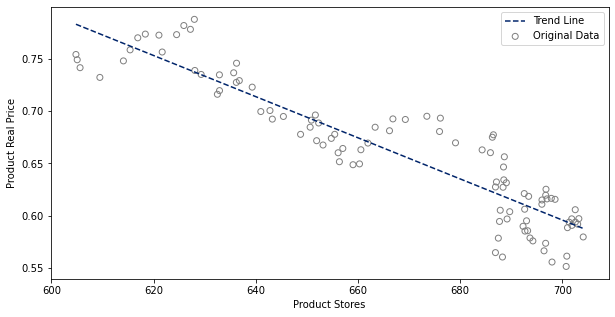

In [185]:
# The collienarity bewtween the product_stores and the prodcut_real price can also be illustrated with a graph below

lr = LinearRegression()
X_ = quantity['product_stores'].values.reshape(-1, 1)
y_ = quantity['product_real_price'].values.reshape(-1, 1)
lr.fit(X_, y_)

X_2 = X_.copy()
X_2.sort(axis=0)

plt.figure(figsize=(10, 5))
plt.scatter(quantity['product_stores'], quantity['product_real_price'], facecolor='none', edgecolor='grey', label='Original Data')
plt.plot(X_2, lr.predict(X_2), linestyle='--', color='#00246A', label='Trend Line')
plt.legend()
plt.xlabel('Product Stores')
plt.ylabel('Product Real Price')

### The revised model

I decided to drop the feature of product_stores (VIF=7.979961) instead of the feature of product_real_price (VIF=14.654555) beacuse I believe exploring the **price elasticity of demand** is a more important purpose of this model.

The p-value of log(real_disp_pers_inc) of the revised model can be decreased to 0.017 at the sacrifice of the feature of product stores. Although the statistical power of the model has been improved, the revised model lost the ability to explain the effect of distribution channels (product_stores) on product quantity sold. Less features and data will also lead to the increase in residual sum of suquares (RSS) and the decrease in R-squared.  

#### In conclusion, choosing between the two models should consider the trade-off between statistical power and model explaining ability.

In [179]:
# Build the model without product store feature.
# The p-value of np.log(product_real_price) has been decreased to almost zero.
# The p-vaue of np.log(real_disp_pers_inc) has been decreased to 0.017 smaller than 0.05.
# But the smaller p-value is reached at sacrificing the explaining ability of this model as the R-squared value decreased to 0.933.

model3 = smf.ols('np.log(quantity) ~ np.log(product_real_price) + \
                np.log(service_score) + np.log(real_disp_pers_inc) + \
                M02 + M03 + M04 + M05 + M06 + M07 + M08 + M09 + M10 + M11 + M12', \
                data=quantity).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(quantity)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     84.41
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.19e-43
Time:                        08:49:50   Log-Likelihood:                 129.03
No. Observations:                 100   AIC:                            -228.1
Df Residuals:                      85   BIC:                            -189.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [184]:
# Check the VIF of revised model
# All the VIF are less than 5 indicates a small collinearity

predictors2 = quantity.drop(columns=['quantity', 'month', 'M01', 'product_stores'])

predictors2['product_real_price'] = np.log(predictors2['product_real_price'])
predictors2['service_score'] = np.log(predictors2['service_score'])
predictors2['real_disp_pers_inc'] = np.log(predictors2['real_disp_pers_inc'])

X2 = add_constant(predictors2)
pd.Series([variance_inflation_factor(X2.values, i) 
               for i in range(X2.shape[1])], 
              index=X2.columns)

const                 247976.288344
product_real_price         3.934360
service_score              2.390460
real_disp_pers_inc         2.990241
M02                        1.947164
M03                        1.960987
M04                        1.988782
M05                        1.977243
M06                        1.884641
M07                        1.887660
M08                        1.885087
M09                        1.906610
M10                        1.887332
M11                        1.867256
M12                        1.840710
dtype: float64